In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Employee_Dataset

In [2]:
emp = pd.read_csv(r"C:\Users\HP\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\3363FE422696DA897F8B978B4753DC63577D0189\transfers\2026-07\employee.csv")

In [3]:
emp

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,NaN
9,10,2156,Engineer,Production,45.0,89000.0


In [4]:
emp.isna().sum()

Serial         0
Emp_ID         0
Designation    0
Department     2
Age            1
Salary         3
dtype: int64

In [5]:
emp[emp.Age.isna()]

,Serial,Emp_ID,Designation,Department,Age,Salary
6,7,1111,Accountant,Accounts,NaN,110000.0


In [6]:
emp.Age.fillna(value= emp.Age.mean(),inplace= True)

In [7]:
emp.loc[emp["Department"].isna(), "Department"] = "Marketing"

In [8]:
emp.loc[emp["Salary"].isna(), "Salary"] = emp.Salary.mean()

In [9]:
emp.set_index('Serial',inplace= True)

In [10]:
emp.Department.value_counts()

Department
IT            5
Accounts      4
Production    4
HR            2
Marketing     2
Account       1
Name: count, dtype: int64

In [11]:
emp.loc[emp.Department == 'Account', 'Department'] = 'Accounts'

In [12]:
def Yearly_Salary(Salary):
    return Salary * 12

In [13]:
emp["Yearly_salary"] = emp.Salary.apply(Yearly_Salary)

In [14]:
emp["Yearly_tax"] = [i*0.10 if i>=2000000 else i*0.05 if i>=1000000 else i*0.03 for i in emp.Yearly_salary]

In [15]:
emp["Experience_level"] = ["Senior" if i>= 45 else "Middle" if i>= 30 else "junior" for i in emp.Age]

In [16]:
emp["Bonus"] = [i*0.3 if i >= 2000000 else i*0.5 if i>= 1000000 else i*10 for i in emp.Yearly_salary]

In [17]:
emp["Annual_Leave"] = ["10 Leave" if i == 'Manager'  else "20 Leave" if i == "Officer"  else "7 Leave" if i == "Office boy" else "15 Leave" if i == "Accountant" else '5 Leave' for i in emp.Designation]

In [18]:
emp

,Emp_ID,Designation,Department,Age,Salary,Yearly_salary,Yearly_tax,Experience_level,Bonus,Annual_Leave
Serial,,,,,,,,,,
1,1101,Manager,Accounts,50.000000,200000.0,2400000.0,240000.0,Senior,720000.0,10 Leave
2,1107,Officer,IT,30.000000,80000.0,960000.0,28800.0,Middle,9600000.0,20 Leave
3,1203,Officer,HR,28.000000,97000.0,1164000.0,58200.0,junior,582000.0,20 Leave
4,1005,Manager,HR,45.000000,120000.0,1440000.0,72000.0,Senior,720000.0,10 Leave
5,2123,Office Boy,Accounts,27.000000,45000.0,540000.0,16200.0,junior,5400000.0,5 Leave
6,2451,Accountant,Marketing,34.000000,100000.0,1200000.0,60000.0,Middle,600000.0,15 Leave
7,1111,Accountant,Accounts,34.294118,110000.0,1320000.0,66000.0,Middle,660000.0,15 Leave
8,1001,Officer,IT,25.000000,75000.0,900000.0,27000.0,junior,9000000.0,20 Leave
9,1234,Manager,IT,23.000000,97000.0,1164000.0,58200.0,junior,582000.0,10 Leave


In [19]:
emp.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Emp_ID,18.0,NaN,NaN,NaN,1995.333333,1334.508369,1001.0,1108.0,1678.5,2156.0,6543.0
Designation,18,5,Officer,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,18,5,Accounts,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,18.0,NaN,NaN,NaN,34.294118,9.429395,23.0,27.0,30.5,45.0,50.0
Salary,18.0,NaN,NaN,NaN,97000.0,32927.728347,45000.0,89000.0,97000.0,100000.0,200000.0
Yearly_salary,18.0,NaN,NaN,NaN,1164000.0,395132.740168,540000.0,1068000.0,1164000.0,1200000.0,2400000.0
Yearly_tax,18.0,NaN,NaN,NaN,61600.0,47774.026909,16200.0,53400.0,58200.0,60000.0,240000.0
Experience_level,18,3,junior,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus,18.0,NaN,NaN,NaN,2107000.0,3037318.883489,534000.0,582000.0,600000.0,733500.0,9600000.0
Annual_Leave,18,4,20 Leave,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_13252\2353763906.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = emp['Designation'], palette= 'rainbow')


<Axes: xlabel='Designation', ylabel='count'>

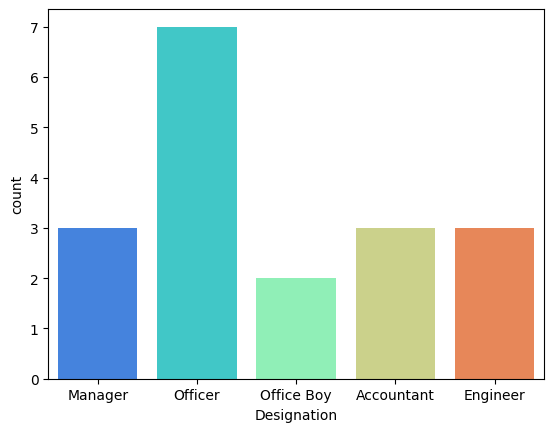

In [20]:
sns.countplot(x = emp['Designation'], palette= 'rainbow')

C:\Users\HP\AppData\Local\Temp\ipykernel_13252\3865474407.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = emp['Department'], palette= 'rainbow')


<Axes: xlabel='Department', ylabel='count'>

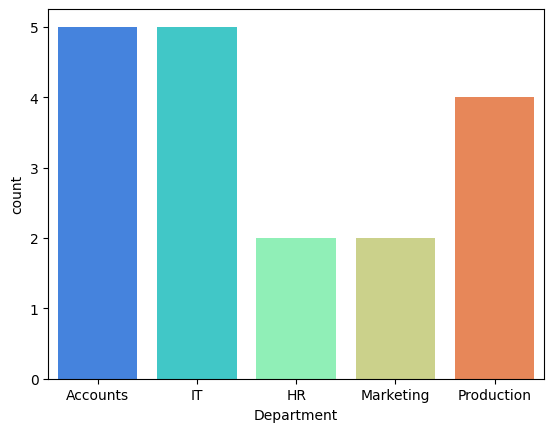

In [21]:
sns.countplot(x = emp['Department'], palette= 'rainbow')

<Axes: xlabel='Experience_level', ylabel='count'>

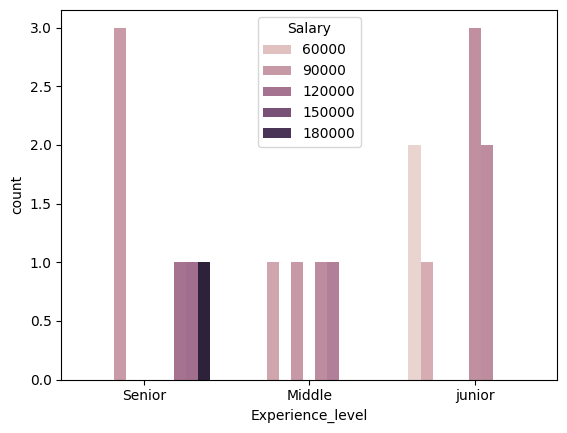

In [22]:
sns.countplot(x = emp['Experience_level'], hue= emp['Salary'])

<Axes: xlabel='Department', ylabel='Experience_level'>

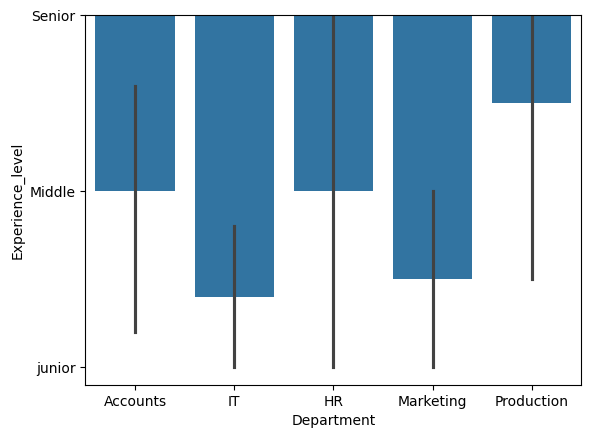

In [23]:
sns.barplot(x= emp['Department'], y= emp['Experience_level'], data= emp)

<Axes: xlabel='Designation', ylabel='Experience_level'>

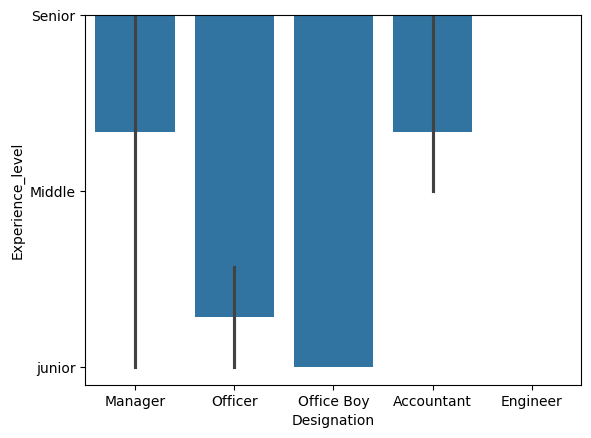

In [24]:
sns.barplot(x= emp['Designation'], y= emp['Experience_level'], data= emp)

<Axes: xlabel='Designation', ylabel='Annual_Leave'>

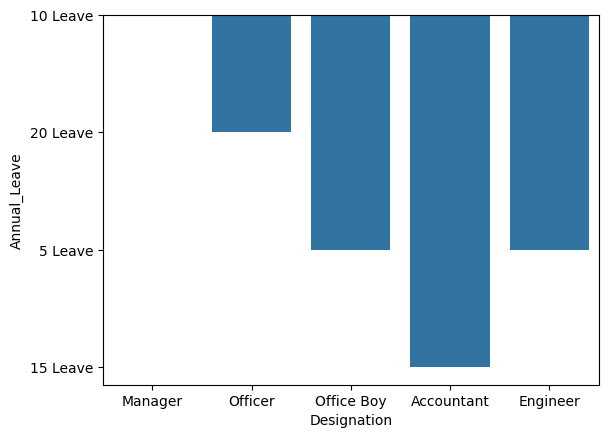

In [25]:
sns.barplot(x= emp['Designation'], y= emp['Annual_Leave'], data= emp)

<Axes: xlabel='Salary', ylabel='Annual_Leave'>

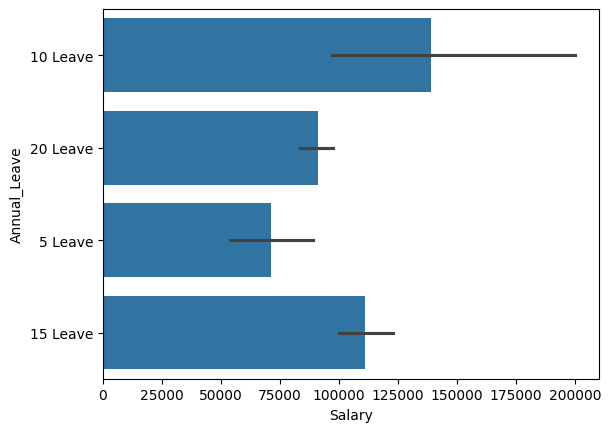

In [26]:
sns.barplot(x= emp['Salary'], y= emp['Annual_Leave'], data= emp)

<Axes: xlabel='Bonus', ylabel='Annual_Leave'>

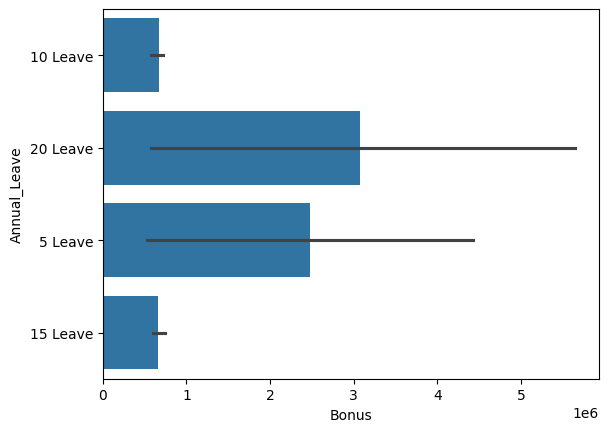

In [27]:
sns.barplot(x= emp['Bonus'], y= emp['Annual_Leave'], data= emp)

C:\Users\HP\AppData\Local\Temp\ipykernel_13252\1633395257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = emp['Department'], y= emp['Salary'], data= emp, palette= 'rainbow')


<Axes: xlabel='Department', ylabel='Salary'>

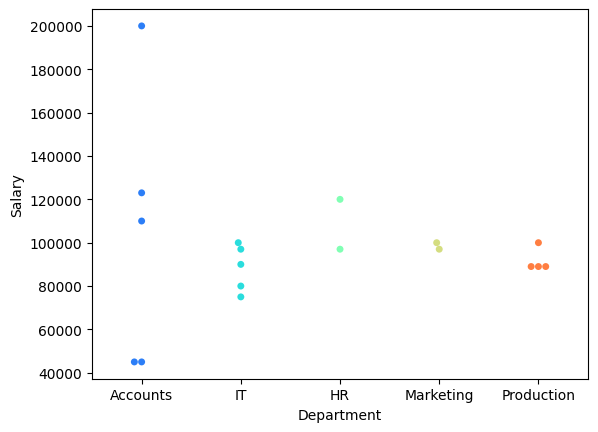

In [28]:
sns.swarmplot(x = emp['Department'], y= emp['Salary'], data= emp, palette= 'rainbow')

# Student_Marksheet_Dataset

In [29]:
std = pd.read_excel(r"C:\Users\HP\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\3363FE422696DA897F8B978B4753DC63577D0189\transfers\2026-07\std_marks_sheet.xlsx")

In [30]:
std

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
0,Ahmed Raza,10001,52,64,52,74,51,49,70,412,B
1,Muhammad Asim,10002,85,53,78,61,86,46,53,462,A
2,Asad Ali,10003,60,97,73,57,52,80,50,469,A
3,Hassan Raza,10004,87,99,63,64,85,43,94,535,A
4,Ali Hamza,10005,82,72,67,50,53,40,54,418,B
...,...,...,...,...,...,...,...,...,...,...,...
95,Hasnain Ahmed,10096,62,100,85,54,96,94,83,574,A
96,Zubair Raza,10097,42,60,88,92,57,56,59,454,A
97,Ahmer Ali,10098,45,60,60,91,60,57,98,471,A
98,Nabeel Ahmed,10099,97,75,81,98,72,50,85,558,A


In [31]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       100 non-null    object
 1   roll num   100 non-null    int64 
 2   python     100 non-null    int64 
 3   numpy      100 non-null    int64 
 4   pandas     100 non-null    int64 
 5   streamlit  100 non-null    int64 
 6   ML         100 non-null    int64 
 7   DL         100 non-null    int64 
 8   NLP        100 non-null    int64 
 9   Total      100 non-null    int64 
 10  Grade      100 non-null    object
dtypes: int64(9), object(2)
memory usage: 8.7+ KB


In [32]:
std.shape

(100, 11)

In [33]:
std.isna().sum()

name         0
roll num     0
python       0
numpy        0
pandas       0
streamlit    0
ML           0
DL           0
NLP          0
Total        0
Grade        0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_13252\1348677044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(std['Grade'], palette= 'mako')


Text(0.5, 1.0, 'Grade')

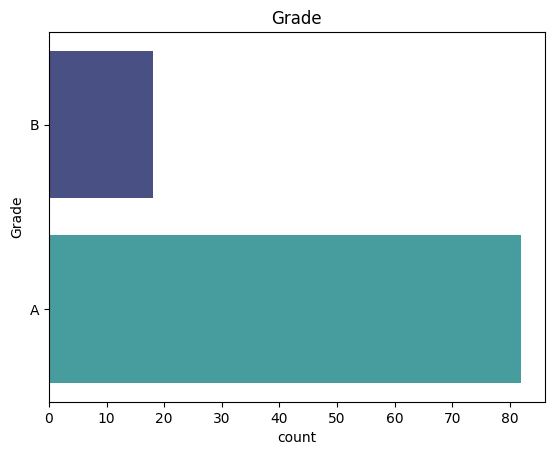

In [34]:
sns.countplot(std['Grade'], palette= 'mako')
plt.title("Grade")

In [35]:
std.groupby('name')['Total'].mean()

name
Abdul Rehman       515.0
Abdullah Naveed    470.0
Abrar Ali          402.0
Adeel Ahmed        467.0
Adnan Ali          442.0
                   ...  
Zarar Raza         505.0
Zayan Raza         471.0
Zeeshan Raza       510.0
Zubair Ali         539.0
Zubair Raza        454.0
Name: Total, Length: 100, dtype: float64

In [36]:
std[(std['Total'] >= 550) & (std['Grade'] == 'A')]

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
9,Zain Ali,10010,71,100,71,93,73,88,85,581,A
17,Shahzaib Ali,10018,90,54,96,88,81,96,98,603,A
76,Ismail Ahmed,10077,79,85,84,97,78,92,62,577,A
81,Shakir Raza,10082,99,95,77,47,84,98,58,558,A
83,Amin Ahmed,10084,100,95,92,85,89,87,48,596,A
95,Hasnain Ahmed,10096,62,100,85,54,96,94,83,574,A
98,Nabeel Ahmed,10099,97,75,81,98,72,50,85,558,A


In [37]:
std

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
0,Ahmed Raza,10001,52,64,52,74,51,49,70,412,B
1,Muhammad Asim,10002,85,53,78,61,86,46,53,462,A
2,Asad Ali,10003,60,97,73,57,52,80,50,469,A
3,Hassan Raza,10004,87,99,63,64,85,43,94,535,A
4,Ali Hamza,10005,82,72,67,50,53,40,54,418,B
...,...,...,...,...,...,...,...,...,...,...,...
95,Hasnain Ahmed,10096,62,100,85,54,96,94,83,574,A
96,Zubair Raza,10097,42,60,88,92,57,56,59,454,A
97,Ahmer Ali,10098,45,60,60,91,60,57,98,471,A
98,Nabeel Ahmed,10099,97,75,81,98,72,50,85,558,A


C:\Users\HP\AppData\Local\Temp\ipykernel_13252\2509637231.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= std['Total'], y= std['Grade'], data= std, palette= 'rainbow')


<Axes: xlabel='Total', ylabel='Grade'>

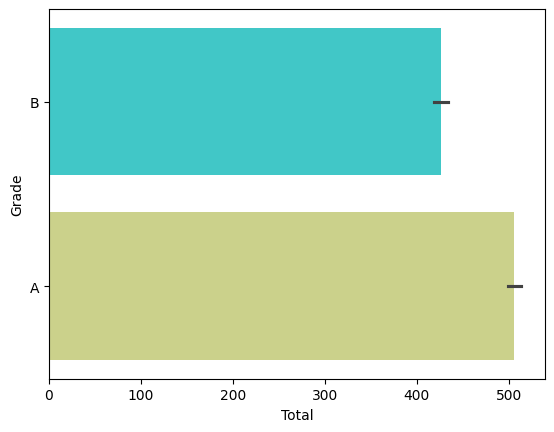

In [38]:
sns.barplot(x= std['Total'], y= std['Grade'], data= std, palette= 'rainbow')

In [39]:
std

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
0,Ahmed Raza,10001,52,64,52,74,51,49,70,412,B
1,Muhammad Asim,10002,85,53,78,61,86,46,53,462,A
2,Asad Ali,10003,60,97,73,57,52,80,50,469,A
3,Hassan Raza,10004,87,99,63,64,85,43,94,535,A
4,Ali Hamza,10005,82,72,67,50,53,40,54,418,B
...,...,...,...,...,...,...,...,...,...,...,...
95,Hasnain Ahmed,10096,62,100,85,54,96,94,83,574,A
96,Zubair Raza,10097,42,60,88,92,57,56,59,454,A
97,Ahmer Ali,10098,45,60,60,91,60,57,98,471,A
98,Nabeel Ahmed,10099,97,75,81,98,72,50,85,558,A


In [40]:
 s1 = std.sort_values(by= 'pandas', ascending= False).head(10)[['name', 'pandas']]

In [41]:
s1

,name,pandas
20,Abdullah Naveed,99
25,Rizwan Ali,99
11,Saad Ahmed,99
7,Fahad Khan,99
82,Faisal Ali,99
94,Affan Raza,99
62,Furqan Raza,99
12,Umer Farooq,98
57,Khalid Ali,97
71,Rafay Raza,97


Text(0.5, 1.0, 'Top_10_Python_marks')

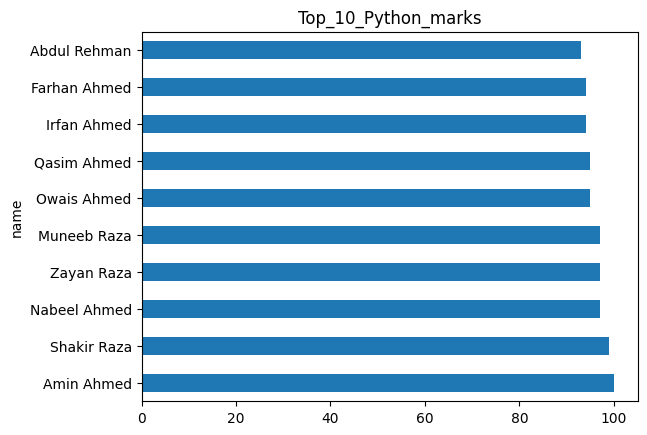

In [89]:
Top_10_marks = std.groupby('name')['python'].sum().sort_values(ascending= False).head(10)
Top_10_marks.plot(kind= 'barh')
plt.title("Top_10_Python_marks")

In [74]:
std[(std['Total'] <= 420) & (std['NLP'] >= 70)]

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
0,Ahmed Raza,10001,52,64,52,74,51,49,70,412,B
15,Imran Khan,10016,51,42,74,53,57,51,83,411,B
88,Akram Ali,10089,76,55,42,54,49,47,91,414,B


In [80]:
std[(std['pandas'] >= 90) & (std['Grade'] == "B")]

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
45,Shayan Ali,10046,67,50,90,70,82,41,43,443,B


In [83]:
std['name'].duplicated().sum()

np.int64(0)

In [84]:
std['Total'].mean(
)

np.float64(491.83)

In [85]:
std['python'].mean()

np.float64(70.4)

In [86]:
std

,name,roll num,python,numpy,pandas,streamlit,ML,DL,NLP,Total,Grade
0,Ahmed Raza,10001,52,64,52,74,51,49,70,412,B
1,Muhammad Asim,10002,85,53,78,61,86,46,53,462,A
2,Asad Ali,10003,60,97,73,57,52,80,50,469,A
3,Hassan Raza,10004,87,99,63,64,85,43,94,535,A
4,Ali Hamza,10005,82,72,67,50,53,40,54,418,B
...,...,...,...,...,...,...,...,...,...,...,...
95,Hasnain Ahmed,10096,62,100,85,54,96,94,83,574,A
96,Zubair Raza,10097,42,60,88,92,57,56,59,454,A
97,Ahmer Ali,10098,45,60,60,91,60,57,98,471,A
98,Nabeel Ahmed,10099,97,75,81,98,72,50,85,558,A


C:\Users\HP\AppData\Local\Temp\ipykernel_13252\2820950224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = std['Total'], y= std['Grade'], palette= 'rainbow')


<Axes: xlabel='Total', ylabel='Grade'>

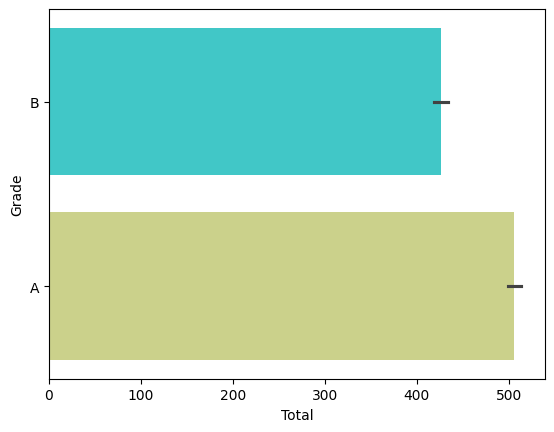

In [91]:
sns.barplot(x = std['Total'], y= std['Grade'], palette= 'rainbow')

C:\Users\HP\AppData\Local\Temp\ipykernel_13252\1287135236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= std['ML'].head(10), y= std['DL'].head(10), palette= 'plasma')


<Axes: xlabel='ML', ylabel='DL'>

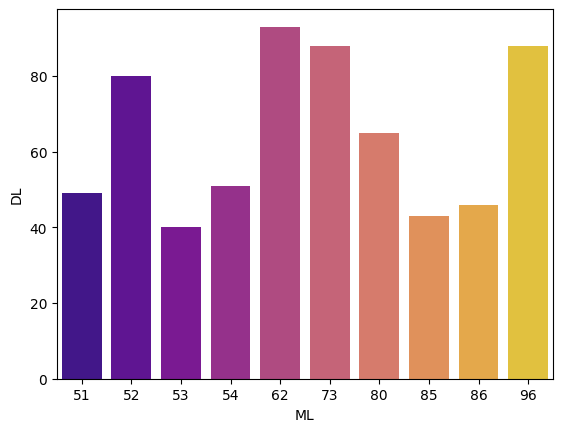

In [95]:
sns.barplot(x= std['ML'].head(10), y= std['DL'].head(10), palette= 'plasma')

<Axes: xlabel='NLP', ylabel='python'>

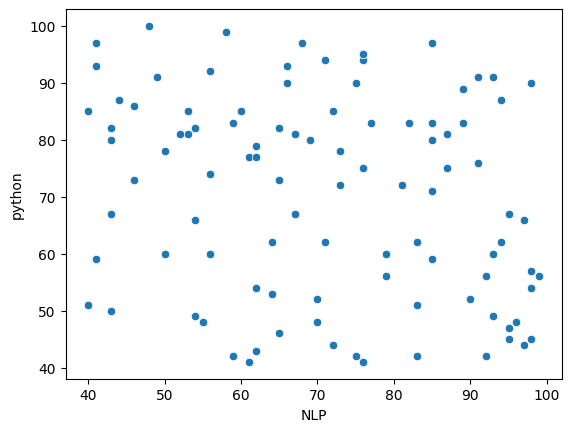

In [97]:
sns.scatterplot(x= std['NLP'], y= std['python'])

C:\Users\HP\AppData\Local\Temp\ipykernel_13252\3327877913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= std['NLP'], y= std['python'], palette= 'inferno')


<Axes: xlabel='NLP', ylabel='python'>

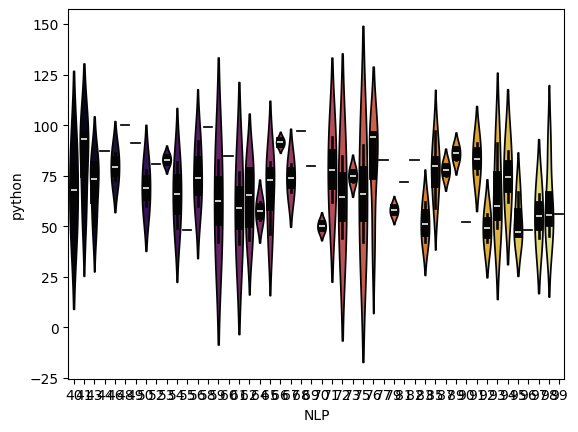

In [100]:
sns.violinplot(x= std['NLP'], y= std['python'], palette= 'inferno')

In [101]:
std.to_csv('Assignment_Of(Employee and Student_Data_set)', index= False)